# Спецификация к Лабораторной работе №10 

# Процедуры и параметры. 

# Поиск экстремума с двумя условиями.

# (Вариант 22)

## Абстракция А0
### 1. Постановка задачи.
#### Задание: 
Написать программу обработки одномерного массива в соответствии с условием, 

выделив подзадачи проверки условий и поиска экстремума и оформив их в виде процедур.

#### Условие: 
Для заданного целочисленного массива $\{A_1, A_2, …, A_n\}$ определить 

номер первого максимального значения среди элементов, 

- меньших A1 и 

- расположенных правее последнего элемента, кратного девяти. 

### 2. Уточненная постановка задачи.
Дан одномерный целочисленный массив A из n элементов.

Обозначим индекс $k: (A_k \in A) \land (A_k \vdots 9) \land \neg (A_i \vdots 9), \forall i > k$. 

Найти $\displaystyle{j: A_j = \max_i \{A_i: A_i < A_1, \forall i > k\} }$.

### 3. Пример с иллюстрацией.

In [1]:
from IPython.display import Image
import numpy
import pylab 
%matplotlib inline
pylab.style.use('seaborn-whitegrid')

In [7]:
A1 = numpy.random.randint(-100, 100, size=50)
numpy.savetxt('A_Lab10_1.txt', A1, fmt='%5.0f')
A2 = numpy.random.randint(1, 3, size=10)
numpy.savetxt('A_Lab10_2.txt', A2, fmt='%5.0f')
A3 = numpy.random.randint(5, 10, size=50)
numpy.savetxt('A_Lab10_3.txt', A3, fmt='%5.0f')
A4 = numpy.random.randint(-10, 10, size=20)
numpy.savetxt('A_Lab10_4.txt', A4, fmt='%5.0f')
A5 = numpy.random.randint(-10, 0, size=20)
numpy.savetxt('A_Lab10_5.txt', A5, fmt='%5.0f')

print('\n', A1, '\n\n', A2, '\n\n', A3, '\n\n', A4, '\n\n', A5)


 [  31   75   -9   48   27  -44  -21   59   43  -33   45   38  -55  -40
  -61   84  -48  -61  -99  -69  -39   -2  -75    4  -93    5  -15   47
  -15  -78  -55  -33   86  -48   87   37   17    7    3  -92  -27  -65
   26  -77   49  -69   70 -100   57   22] 

 [1 2 2 2 1 1 1 2 1 1] 

 [8 6 6 9 7 5 9 9 9 8 5 5 5 6 9 7 8 9 5 6 5 6 9 5 5 8 9 8 8 9 7 7 6 6 5 8 6
 6 5 8 5 6 8 9 7 7 9 6 7 5] 

 [-1 -1  8  1  6  4  5 -6 -4  5  8  2 -8  3 -7 -3 -2  2  9 -8] 

 [-9 -3 -4 -1 -9 -8 -8 -9 -3 -4 -2 -4 -2 -1 -3 -9 -3 -8 -4 -7]


In [14]:
# python only
print(20*' ' + 'Лаб.10\n' + 110*'=')

fin = str(input('Текстовый файл с элементами массива A: '))
fout = str(input('Текстовый файл с элементами массива A и индексом максимального значения: '))

with open(fin, 'r') as f:
    A = [int(x) for x in f.readlines()]
    
print(110*'=' + '\n' + 'Массив A: \n')
print(A)

def conditions(A):
    k = 0
    for i in range(len(A)):
        if A[i] % 9 == 0: 
            k = i + 1
    ci = []       
    for i in range(k, len(A)):
        if (A[i] < A[0]): 
            ci.append(i)    
    return ci, k

ci, k = conditions(A)

def max_condition(A, ci):
    j, MAX = 0, -1000000
    for i in range(len(A)):
        if i in ci:
            if (A[i] > MAX):
                MAX, j = A[i], i + 1
    return j

j = max_condition(A, ci)

if j == 0:
    print(110*'=' + '\n' + 'Нет таких элементов')
else:
    print(110*'=' + '\n' + 'Индекс максимального значения выбранных элементов массива A:', j)

with open(fout, 'w') as f:
    for i in range(len(A)):
        f.write("{}\n".format(A[i]))
    f.write("{}".format(j))

                    Лаб.10
Текстовый файл с элементами массива A: A_Lab10_1.txt
Текстовый файл с элементами массива A и индексом максимального значения: Aj_Lab10_1.txt
Массив A: 

[31, 75, -9, 48, 27, -44, -21, 59, 43, -33, 45, 38, -55, -40, -61, 84, -48, -61, -99, -69, -39, -2, -75, 4, -93, 5, -15, 47, -15, -78, -55, -33, 86, -48, 87, 37, 17, 7, 3, -92, -27, -65, 26, -77, 49, -69, 70, -100, 57, 22]
Индекс максимального значения выбранных элементов массива A: 43


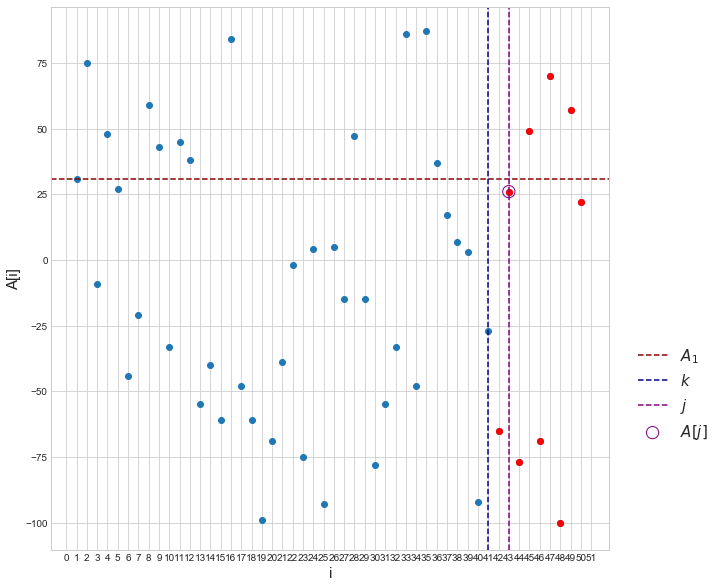

In [16]:
pylab.figure(figsize=(10,10))
pylab.scatter(range(len(A)), A)
pylab.scatter(range(k, len(A)), A[k:], c='r')
pylab.scatter(j-1, A[j-1], s=150, label=r'$A[j]$',
              facecolors='none', edgecolors='purple')
pylab.axhline(A[0], c='darkred', ls='--', label=r'$A_1$')
pylab.axvline(k-1, c='darkblue', ls='--', label=r'$k$')
pylab.axvline(j-1, c='purple', ls='--', label=r'$j$')

pylab.xlabel('i', fontsize=15) 
pylab.ylabel('A[i]', fontsize=15)
pylab.xticks(range(-1, len(A)+1), range(len(A)+2));
pylab.legend(fontsize=15, shadow=True, bbox_to_anchor=(1.2,0.4));

### 4. Таблица данных 

| Класс | Имя | Описание (смысл, диапазон, точность) | Тип | Структура | Формат в/в |
| :-: | :-: | :-: | :-: | :-: | :-: |
| входные данные | fin | название текстового файла с элементами массива А | символ | строка | "+X.txt" |
| входные данные | fout | название текстового файла с элементами массива А | символ | строка | "+X.txt" |
| входные данные | A | вводимые из текстового файла числа | цел | одномерный массив | +XX (:5) |
| выходные данные | j | выводимый в текстовый файл индекс максимального значения среди выбранных элементов | цел | простая переменная | XX (:2) |
| промежуточные данные | i | индекс текущего элемента, 1≤i≤50 | цел | простая переменная | --- |
| промежуточные данные | n | количество элементов массива, 1≤i≤50 | цел | простая переменная | --- |
| промежуточные данные | k | индекс последнего кратного 9 элемента из $A$ | цел | простая переменная | --- |
| промежуточные данные | ci | индексы элементов, удовлетворяющих условиям | цел | одномерный массив | --- |
| промежуточные данные | c | количество элементов, удовлетворяющих условиям | цел | простая переменная | --- |
| промежуточные данные | MAX | максимальное значение среди выбранных элементов | цел | простая переменная | --- |

_! в Delphi выход из цикла с 1 до 20 с шагом +1 происходит при значении 21, из цикла с 20 до 1 – при 0_

### 5. Входная форма
- обр 1.1 Текстовый файл с элементами массива A: $<fin>$       
- обр 1.2 Текстовый файл с элементами массива A и номером столбца N: $<fout>$
- обр 2.1 Массив A:
- обр 2.2 $ < A[1] >  < A[2] >  …  < A[n] >$


### 6. Выходная форма

- обр 3 Лаб. 10
- обр 4.1 Текстовый файл с элементами массива A: $<fin>$       
- обр 4.2 Текстовый файл с элементами массива A и номером столбца N: $<fout>$
- обр 5.1 Массив A:
- обр 5.2 $ < A[1] >  < A[2] >  …  < A[n] >$
- обр 6.1 Индекс максимального значения выбранных элементов массива A: $ < j > $
- обр 6.2 Нет таких элементов

### 7. Аномалии

-

### 8. Функциональные тесты

| Исходные данные | - | - |Результаты | - | Тест |
| :-: | :-: | :-: | :-: | :-: | :-: |
| fin | fout | A | j | Сообщение |№ |
| A_Lab10_1.txt | Aj_Lab10_1.txt | `[31, 75, -9, 48, 27, -44, -21, 59, 43, -33, 45, 38, -55, -40, -61, 84, -48, -61, -99, -69, -39, -2, -75, 4, -93, 5, -15, 47, -15, -78, -55, -33, 86, -48, 87, 37, 17, 7, 3, -92, -27, -65, 26, -77, 49, -69, 70, -100, 57, 22]` | `43` | - | 1 | 
| - | - | - | - | - | - |
| A_Lab10_2.txt | Aj_Lab10_2.txt | `[1, 2, 2, 2, 1, 1, 1, 2, 1, 1]` | `0` | `Нет таких элементов` | 2 |
| - | - | - | - | - | - |
| A_Lab10_3.txt | Aj_Lab10_3.txt | `[8, 6, 6, 9, 7, 5, 9, 9, 9, 8, 5, 5, 5, 6, 9, 7, 8, 9, 5, 6, 5, 6, 9, 5, 5, 8, 9, 8, 8, 9, 7, 7, 6, 6, 5, 8, 6, 6, 5, 8, 5, 6, 8, 9, 7, 7, 9, 6, 7, 5]` | `49` | - | 3 |
| - | - | - | - | - | - |
| A_Lab10_4.txt | Aj_Lab10_4.txt | `[-1, -1, 8, 1, 6, 4, 5, -6, -4, 5, 8, 2, -8, 3, -7, -3, -2, 2, 9, -8]` | `20` | - | 4 |
| - | - | - | - | - | - |
| A_Lab10_5.txt | Aj_Lab10_5.txt | `[-9, -3, -4, -1, -9, -8, -8, -9, -3, -4, -2, -4, -2, -1, -3, -9, -3, -8, -4, -7]` | `0` | `Нет таких элементов` | 5 |

| № теста | Входные  данные | - | - | Ожидаемый результат | - | Смысл теста |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| - | - | - | - | - | - | - |
| 1 | fin = 'A_Lab10_1.txt' | fout = 'Aj_Lab10_1.txt' |  A = `[31, 75, -9, 48, 27, -44, -21, 59, 43, -33, 45, 38, -55, -40, -61, 84, -48, -61, -99, -69, -39, -2, -75, 4, -93, 5, -15, 47, -15, -78, -55, -33, 86, -48, 87, 37, 17, 7, 3, -92, -27, -65, 26, -77, 49, -69, 70, -100, 57, 22]` | j = `43` | - | Подтвердить правильность расчетов в случае широкого спектра положительных и отрицательных чисел |
| - | - | - | - | - | - | - |
| 2 | fin = 'A_Lab10_2.txt' | fout = 'Aj_Lab10_2.txt' |  A = `[1, 2, 2, 2, 1, 1, 1, 2, 1, 1]` | j = `0` | Сообщение = 'Нет таких элементов' | Протестировать простейший случай |
| - | - | - | - | - | - | - |
| 3 | fin = 'A_Lab10_3.txt' | fout = 'Aj_Lab10_3.txt' |  A = `[8, 6, 6, 9, 7, 5, 9, 9, 9, 8, 5, 5, 5, 6, 9, 7, 8, 9, 5, 6, 5, 6, 9, 5, 5, 8, 9, 8, 8, 9, 7, 7, 6, 6, 5, 8, 6, 6, 5, 8, 5, 6, 8, 9, 7, 7, 9, 6, 7, 5]` | j = `49` | - | Протестировать массив в узком диапазоне положительных чисел |
| - | - | - | - | - | - | - |
| 4 | fin = 'A_Lab10_4.txt' | fout = 'Aj_Lab10_4.txt' |  A = `[-1, -1, 8, 1, 6, 4, 5, -6, -4, 5, 8, 2, -8, 3, -7, -3, -2, 2, 9, -8]` | j = `20` | - | Протестировать массив в узком диапазоне положительных и отрицательныхчисел |
| - | - | - | - | - | - | - |
| 5 | fin = 'A_Lab10_5.txt' | fout = 'Aj_Lab10_5.txt' |  A = `[-9, -3, -4, -1, -9, -8, -8, -9, -3, -4, -2, -4, -2, -1, -3, -9, -3, -8, -4, -7]` | j = `0` | Сообщение = 'Нет таких элементов' | Подтвердить правильность расчетов в случае отрицательных чисел |

| - | Результаты | № теста |
| :-: | :-: | :-: |
| - | - | - |
| j | Максимальная вычислительная нагрузка = 50 (проверка делимости) + 9 (проверка меньше ли первого элемента) + 6 (поиск максимума) | 1 |
| - | Соответствует ожидаемым числовым значениям | - |
| j | 0 | 2 |
| - | Отсутствие элементов, соответствующих условиям | - |
| j | Максимальная вычислительная нагрузка = 50 (проверка делимости) + 3 (проверка меньше ли первого элемента) + 3 (поиск максимума) | 3 |
| - | Соответствует ожидаемым числовым значениям и легко подтверждается визуально | - |
| j | Максимальная вычислительная нагрузка = 20 (проверка делимости) + 1 (проверка меньше ли первого элемента) + 1 (поиск максимума) | 4 |
| - | Соответствует ожидаемым числовым значениям | - |
| j | 0 | 5 |
| - | Отсутствие элементов, соответствующих условиям | - |
| - | - | - |
| Сообщение | - | 1 |
| Сообщение | Нет таких элементов | 2 |
| Сообщение | - | 3 |
| Сообщение | - | 4 |
| Сообщение | Нет таких элементов | 5 |

### 9. Метод
Отделим ввод-вывод от обработки данных и разделим задачу на три подзадачи:

1. _Подзадача А 0.1._ Запросить названия текстовых файлов ввода-вывода, считать из текстового файла ввода исходные данные (обр.1-2), затем вывести их на экран (обр.3-6) для визуального подтверждения.
2. _Подзадача А 0.2._ Решение поставленной задачи: 

   2.1. На основе введенных исходных данных (`A`) с помощью первой процедуры определить индексы элементов массива,

    - меньших A1 и

    - расположенных правее последнего элемента, кратного девяти.
    
   2.2. С помощью второй процедуры определить индекс элемента (`j`) с максимальным значением среди отфильтрованных первой процедурой элементов.
    
3. _Подзадача А 0.3._ Ввести полученные результаты (`j`) на экран (обр.6) и записать в файл вывода исходный массив и полученный результат.

Ввод-вывод тривиален и представляет собой чисто техническую задачу. 

Для осуществления процесса ввода-вывода и обработки массива потребуются промежуточные переменные: 

- `i` – индекс текущего элемента массива, 

- `n` - количество элементов массива,

- `c` - количество элементов, удовлетворяющих условиям отбора,

- `k` - индекс последнего кратного 9 элемента в массиве,

- `ci` - массив индексов элементов, удовлетворяющих условиям отбора,

- `MAX` - максимальное значение среди выбранных элементов массива.

Их следует добавить в таблицу данных. 

Алгоритм необходим только для обработка входных данных и расчета результата. 

### 10. Алгоритм

[Sample diagrams](http://blockdiag.com/en/blockdiag/examples.html#sample-diagrams)

In [23]:
%%file block_diagram

blockdiag {
    orientation = portrait;
    class start_end [shape = ellipse, fontsize = 15, color = lightskyblue];
    class input_out [shape = flowchart.input, fontsize = 15, width = 750, color = lightcyan];
    class main_box [shape = box, width = 500, height = 150, fontsize = 18];
    
    Начало -> 
    "Вывод заголовка по обр.3 на экран" -> 
    "Ввод имени файла по обр.1.1" -> "Ввод имени файла по обр.1.2" ->
    "Вывод пояснения по обр.2.1" -> "Ввод А из файла по обр.2.2" ->
    "Вывод имени файла по обр.4.1 на экран" -> "Вывод имени файла по обр.4.2 на экран" ->
    "Вывод пояснения по обр.5.1 на экран" -> "Вывод А на экран и в файл по обр.5.2" ->
    "Процедура 1. \nВыбор элементов массива A, \nудовлетворяющих условиям" ->
    "Процедура 2. \nОпределение индекса \nмаксимального значения \n среди выбранных элементов \n(j)" ->
    "Вывод j или сообщения на экран и в файл по обр.6" ->
    Конец;

    Начало, Конец [class = "start_end"];
    "Ввод имени файла по обр.1.1", "Ввод имени файла по обр.1.2" [class = "input_out"];
    "Вывод пояснения по обр.2.1", "Ввод А из файла по обр.2.2" [class = "input_out"];
    "Вывод имени файла по обр.4.1 на экран", "Вывод имени файла по обр.4.2 на экран" [class = "input_out"];
    "Вывод пояснения по обр.5.1 на экран", "Вывод А на экран и в файл по обр.5.2" [class = "input_out"]; 
    "Вывод заголовка по обр.3 на экран", "Вывод j или сообщения на экран и в файл по обр.6" [class = "input_out"];
    "Процедура 1. \nВыбор элементов массива A, \nудовлетворяющих условиям" [class = "main_box"];
    "Процедура 2. \nОпределение индекса \nмаксимального значения \n среди выбранных элементов \n(j)" [class = "main_box"];
    
    "Вывод А на экран и в файл по обр.5.2" -> 
    "Процедура 1. \nВыбор элементов массива A, \nудовлетворяющих условиям" [label = 'Вх. А', fontsize = 18];
    "Процедура 2. \nОпределение индекса \nмаксимального значения \n среди выбранных элементов \n(j)" ->
    "Вывод j или сообщения на экран и в файл по обр.6" [label = 'Вых. j', fontsize = 18];
}

Overwriting block_diagram


In [24]:
!blockdiag block_diagram

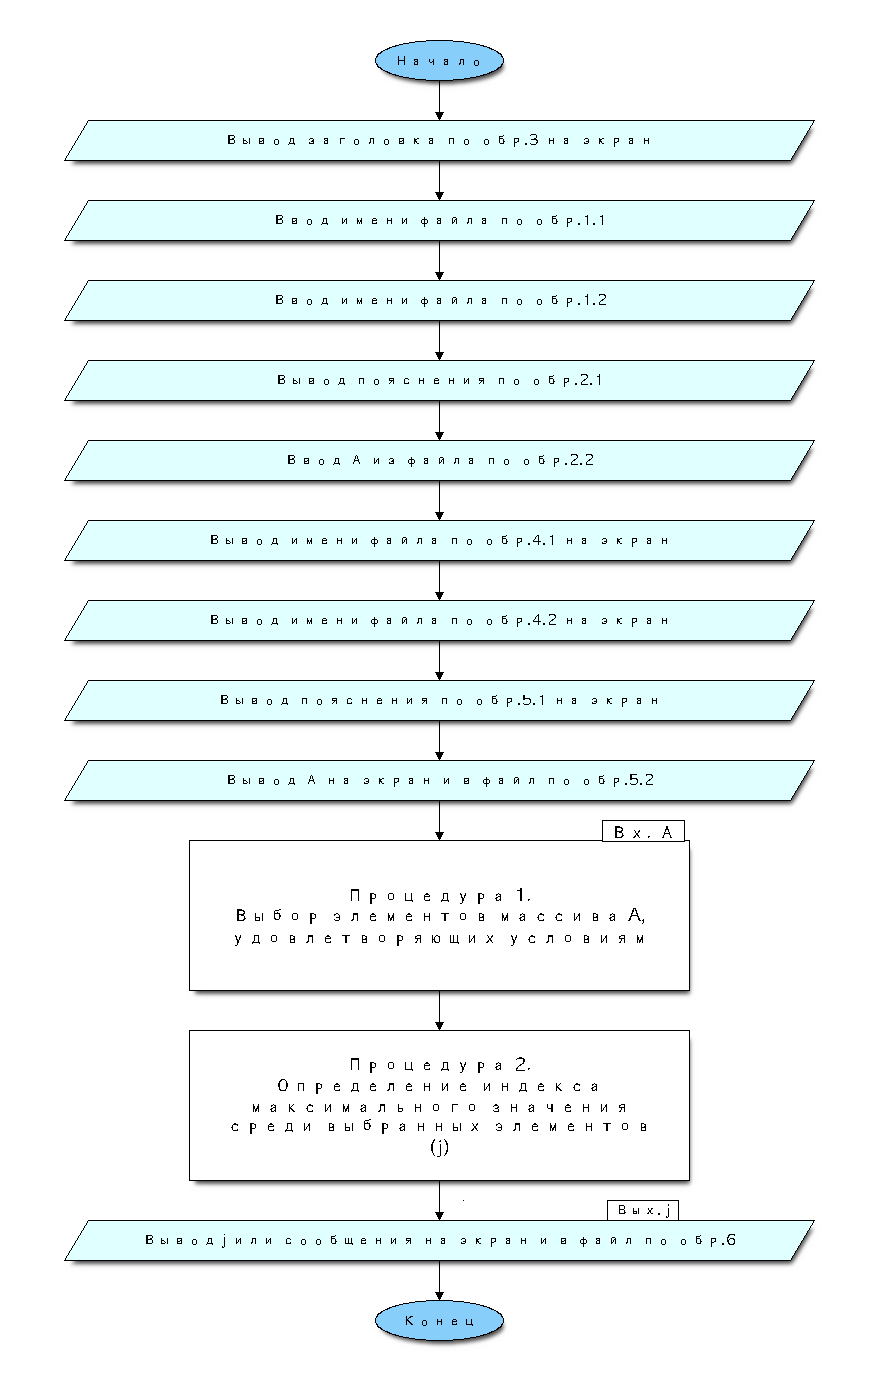

In [25]:
Image("block_diagram.png")

### 11. Программа на <i>Delphi</i>. 

__Диалоговый вариант {ввод названий файлов и данных из текстового файла, вывод на экран и в текстовый файл}__

Синтаксис:

[Pascal Tutorial](https://www.tutorialspoint.com/pascal/index.htm)

Проверить программу онлайн без установки программной среды:

[Compile and Execute Pascal Online](http://www.compileonline.com/compile_pascal_online.php)

In [ ]:
program Lab10; //сохранить как lab10.dpr (DPR – Delphi PRoject)  
{$APPTYPE CONSOLE}
Uses Windows; // 
    const
        A: array [1..50] of integer = (1,2,3,4,5,6,7,8,9,10,
        11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
        31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50);
        ci: array [1..50] of integer = (1,2,3,4,5,6,7,8,9,10,
        11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
        31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50);

    var
        i, j, n: integer;
        c, k, MAX: integer;
        fin, fout: string;
        tfin, tfout: TextFile;

    begin
        setConsoleCP(1251); // 
        setConsoleOutputCP(1251); // 

        {A0.1, A0.3 - ввод-вывод входных данных}
        writeln('Лаб.10' :40); {вывод заголовка c переходом на следующую строку по обр.3}
        
        {ввод-вывод строковой переменной - имени файла с входными данными по обр.1.1, 4.1}
        writeln('Текстовый файл с элементами массива A:  '); 
        readln(fin);
        writeln(fin);

        {ввод-вывод строковой переменной - имени файла с выходными данными по обр.1.2, 4.2}
        writeln('Текстовый файл с элементами массива A и индексом максимального значения: '); 
        readln(fout); 
        writeln(fout);
        
        {ввод-вывод исходного массивa A по обр.2.1, 2.2, 5.1, 5.2}
        writeln('Массив A: '); {вывод пояснения с переходом на следующую строку}
        
        AssignFile(tfin, fin); reset(tfin); {открыть файл для чтения} 
        AssignFile(tfout, fout); rewrite(tfout); {открыть файл для записи}
                
        i := 1;
        while not eof(tfin) do 
        begin
            readln(A[i]); {ввод элемента и переход на следующую строку}
            write(A[i],' '); {вывод элемента на экран}
            i := i + 1;
        end;
        writeln; writeln;
        
        CloseFile(tfin); {закрыть файл для чтения}
        n := i-1;
            
        {заглушка для теста 1}   
        k := 41; ci: array[1..6] of integer = (42, 43, 44, 46, 48, 50);
        j := 43; MAX := 26; 
        // j := 0; writeln('Нет таких элементов'); {заглушка для теста 2}
        {заглушка для теста 3}
        // k := 47; ci: array[1..3] of integer = (48, 49, 50);
        // j := 49; MAX := 7;
        {заглушка для теста 4}
        // k := 19; ci: array[1..1] of integer = (20); 
        // j := 20; MAX := -8;
        // j := 0; writeln('Нет таких элементов'); {заглушка для теста 5} 
   
        for i:=1 to 80 do 
            write('='); {отделим визуально чертой и строкой введенные и выводимые значения}
        writeln; 
                    
        writeln('Индекс максимального значения выбранных элементов массива A: ', j:2);
        {вывод переменной и переход на следующую строку на экране по обр.6}             
        writeln(tfout, j:2); 
        {вывод переменной и переход на следующую строку в файле по обр.6}
        
        CloseFile(tfout); {закрыть файл для записи}
        
    end.

## Раскрытие абстракции А0.2
_Поскольку условие всей задачи совпадает (за исключением необходимости ввода-вывода) с условием выделенной подзадачи,_

_вместо полной спецификации с пунктами 1-11 выполнено просто дополнение к пунктам 9-11._

### 9. Метод
Пусть

- $i$ – номер текущий точки,

- $A[i]$ – соответствующий элемент исходного массива A,

- $n$ - количество элементов массива,

- $k$ - индекс последнего кратного 9 элемента из A,

- $c$ - количество элементов, удовлетворяющих условиям отбора,

- $ci$ - массив индексов элементов, удовлетворяющих условиям отбора:

  - элементы должны быть меньше $A[1]$ и

  - расположены правее последнего элемента, кратного девяти.

- $MAX$ - первое максимальное значение среди выбранных элементов,
  
- $j$ - номер этого первого максимального значения.

_Процедура 1._

На основе данных об исходном массиве выполняется поиск индексов элементов, удовлетворяющих условиям отбора.

Поиск индекса последнего кратного 9 элемента из A осуществляется с помощью цикла.

На каждом этапе определяется, делится элемент на 9 или нет.

Если делится, то значение индекса $k$ обновляется.

Из элементов с индексами $i: k < i < $ длины массива А, определяется, какие из них меньше $A[1]$.

Индексы выбранных таким образом элементов добавляются в массив $ci$.

_Процедура 2._

На основе данных об исходном массиве и массиве индексов выбранных элементов осуществляется поиск максимального значения.

Присвоим переменной начальные значения: $MAX = -10000, j = 0$.

В цикле осуществляется поиск максимума только среди элементов с выбранными в _Процедуре 1_ индексами. 

Если при поиске обнаруживается элемент со значением, больше MAX, то значения переменных $j, MAX$ обновляются.

### 10. Алгоритм

### 11. Программа на <i>Delphi</i>.
#### Программный код раскрытия абстракции.

#### Вариант программы для чтения и записи текстовых файлов.

#### Вариант программы с именами файлов, заданными в качестве параметров.

#### Вариант программы для онлайн-компилятора.
[Compile and Execute Pascal Online](http://www.compileonline.com/compile_pascal_online.php)

In [ ]:
// main.pas
Program Lab10;

const
    A: array [1..50] of integer = (1,2,3,4,5,6,7,8,9,10,
    11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
    31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50);
    ci: array [1..50] of integer = (1,2,3,4,5,6,7,8,9,10,
    11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
    31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50);

var
    i, j, n: integer;
    c, k, MAX: integer;
        
procedure find_elements(n: integer; A: array of integer; var ci: array of integer; var k, c: integer);

begin
    writeln(A[0],' ',n);
    c := 0;
    for i := 0 to n-1 do
    begin
        if (A[i] MOD 9 = 0) then k := i + 1; 
    end;

    for i := k + 1 to n do
    begin
        if A[i-1] < A[0] then
        begin
            c := c + 1;
            ci[c] := i;
        end;
    end;
    writeln;
    if c = 0 then writeln('Нет таких элементов');
end;

procedure find_max(c: integer; A: array of integer; var ci: array of integer; var j, MAX: integer); 

begin
    MAX := -10000;
    for i := 1 to c do
    begin
        write(ci[i],' ');
        if A[ci[i]-1] > MAX then
        begin
            j := ci[i]; MAX := A[ci[i]-1];
        end;
    end;
    writeln;
end;
    
begin
    writeln('Лаб.10' :40); {вывод заголовка c переходом на следующую строку по обр.3}
    writeln('Элементы массива A:  ');
    
    i := 1;
    while not eoln do 
    begin
        readln(A[i]); {ввод элемента и переход на следующую строку}
        write(A[i],' '); {вывод элемента на экран}
        i := i + 1;
    end;
    n := i-1;
    writeln; writeln(A[1],' ',n);
    
    find_elements(n, A, ci, k, c);
    find_max(c, A, ci, j, MAX);
    
    for i:=1 to 80 do 
        write('='); {отделим визуально чертой и строкой введенные и выводимые значения}
    writeln();
    
    {вывод переменной с переходом на следующую строку}    
    writeln('Индекс максимального значения выбранных элементов массива A: ', j:2); 
    writeln(MAX);
end.

In [ ]:
// STDIN
31
75
-9
48
27
-44
-21
59
43
-33
45
38
-55
-40
-61
84
-48
-61
-99
-69
-39
-2
-75
4
-93
5
-15
47
-15
-78
-55
-33
86
-48
87
37
17
7
3
-92
-27
-65
26
-77
49
-69
70
-100
57
22